
Name: Kushal Budhathoki<br>
Student ID: 2501392<br>
For Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv("/content/drive/MyDrive/global_climate_energy_2020_2024.csv")

performing EDA

In [3]:
# printing first 10 row
print("first 10 row are")
df.head(50)
df.shape

first 10 row are


(36540, 10)

In [4]:
print(df['country'].unique())


['Germany' 'France' 'Netherlands' 'Italy' 'Spain' 'Sweden' 'Norway'
 'Poland' 'Turkey' 'United Kingdom' 'United States' 'Canada' 'Brazil'
 'India' 'China' 'Japan' 'Australia' 'South Africa' 'Mexico' 'Indonesia']


In [5]:
df = df.rename(columns={'index': 'date'})

In [6]:
print(df.columns)

Index(['date', 'country', 'avg_temperature', 'humidity', 'co2_emission',
       'energy_consumption', 'renewable_share', 'urban_population',
       'industrial_activity_index', 'energy_price'],
      dtype='object')


In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head(50)

#here now date is sucessdully converted into valida date

,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60
5,2020-01-06,Germany,27.81,32.92,644.48,11955.99,7.08,78.71,78.70,128.62
6,2020-01-07,Germany,29.25,59.40,259.19,4023.14,8.57,75.15,58.83,96.99
7,2020-01-08,Germany,28.90,55.12,76.08,5582.50,12.40,65.77,56.95,70.62
8,2020-01-09,Germany,26.98,88.36,122.54,7129.83,5.95,81.62,48.08,62.45
9,2020-01-10,Germany,27.05,31.19,253.33,4006.50,12.56,85.80,70.89,32.50


here in our data set we have 20 unique country. it gave the value of climate energy of each country from 2020 to 2024. so i aggregate the day value in 3 monthly to make more better

In [8]:
# monthly aggragating per country
# Aggregate  monthly averages of energy consumption per country
monthly_df = (
    df.groupby('country')
      .resample('3M', on='date')
      .mean()
      .reset_index()
)

print(monthly_df.head())
print("Rows after  monthly aggregation:", monthly_df.shape[0])
monthly_df['year'] =  monthly_df['date'].dt.year
monthly_df['month'] = monthly_df['date'].dt.month

monthly_df.head(5)
monthly_df.shape

/tmp/ipython-input-315132905.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('3M', on='date')


     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-01-31        29.129032  59.520323    448.193226   
1  Australia 2020-04-30        34.125556  57.612667    527.932556   
2  Australia 2020-07-31        23.519457  60.837826    370.277935   
3  Australia 2020-10-31        13.015326  56.183370    532.911304   
4  Australia 2021-01-31        23.550652  59.619022    385.865870   

   energy_consumption  renewable_share  urban_population  \
0         5738.055484        11.165161         73.819032   
1         7894.507556         9.401889         74.526111   
2         6118.968804        10.565217         74.660217   
3         8549.576848        10.057935         75.719565   
4         5741.446522        10.764674         76.330000   

   industrial_activity_index  energy_price  
0                  68.508710    119.663548  
1                  71.499556    121.449556  
2                  70.650109    115.577065  
3                  67.387065    120.835000  

(420, 12)

In [9]:
#performing basic overview
print(monthly_df.head())
print(monthly_df.info())
print(monthly_df.isnull().sum())
print(monthly_df.describe())

     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-01-31        29.129032  59.520323    448.193226   
1  Australia 2020-04-30        34.125556  57.612667    527.932556   
2  Australia 2020-07-31        23.519457  60.837826    370.277935   
3  Australia 2020-10-31        13.015326  56.183370    532.911304   
4  Australia 2021-01-31        23.550652  59.619022    385.865870   

   energy_consumption  renewable_share  urban_population  \
0         5738.055484        11.165161         73.819032   
1         7894.507556         9.401889         74.526111   
2         6118.968804        10.565217         74.660217   
3         8549.576848        10.057935         75.719565   
4         5741.446522        10.764674         76.330000   

   industrial_activity_index  energy_price  year  month  
0                  68.508710    119.663548  2020      1  
1                  71.499556    121.449556  2020      4  
2                  70.650109    115.577065  2020  

In [10]:
# handling those missing values
# first select the float and int value columns then Fill missing values in numeric columns with their mean
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)
# Verify againA
print(df.isnull().sum())

date                         0
country                      0
avg_temperature              0
humidity                     0
co2_emission                 0
energy_consumption           0
renewable_share              0
urban_population             0
industrial_activity_index    0
energy_price                 0
dtype: int64


/tmp/ipython-input-3079423169.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


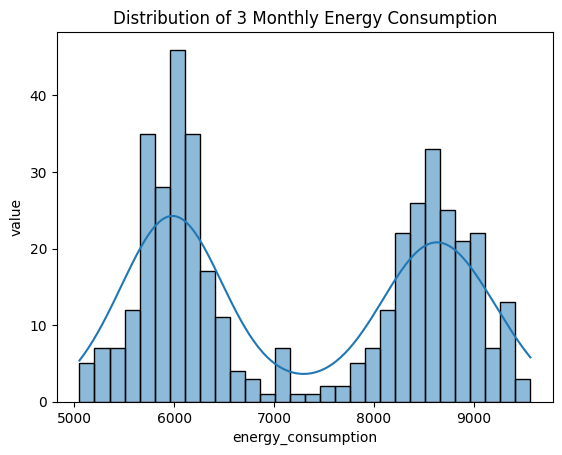

In [11]:
# plotting the histogram to see if the consumption is normally distributed or skewed
sns.histplot(monthly_df['energy_consumption'], bins=30, kde=True)
plt.title("Distribution of 3 Monthly Energy Consumption")
plt.xlabel("energy_consumption")
plt.ylabel("value")
plt.show()


The distribution of weekly energy consumption is bimodal, with peaks around 6,000 and 8,500 units. This indicates two common usage levels, possibly reflecting seasonal or structural differences in demand. Understanding this distribution helps explain model behavior and guides feature engineering

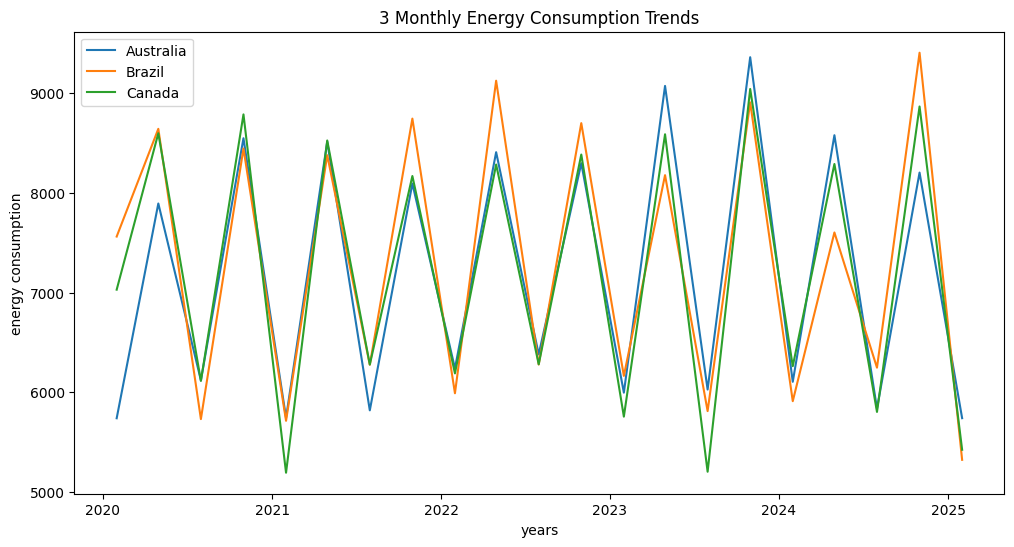

In [12]:
plt.figure(figsize=(12,6))
for country in monthly_df['country'].unique()[:3]:  # plot first 3 countries
    subset = monthly_df[monthly_df['country'] == country]
    # here labels means each line plotted will be tagged for that country
    plt.plot(subset['date'], subset['energy_consumption'], label=country)

plt.legend()
plt.title("3 Monthly Energy Consumption Trends")
plt.xlabel("years")
plt.ylabel("energy consumption")
plt.show()

from above series plot chart we gave notice first 3 country chart how energy are consumption are chnages over a time.  here in x axis we have different years and in y axis we have energy consumption.<br>


1. Australia’s line  Appears relatively stable with moderate fluctuations
2. Brazil: Shows stronger swings, suggesting more pronounced seasonal or demand shifts.

3.  Canada: Also cyclical, but with slightly higher peaks compared to Australia.

from overall it is observed that in some year brazil has become the most eergy consumption used country among these 3 countries.



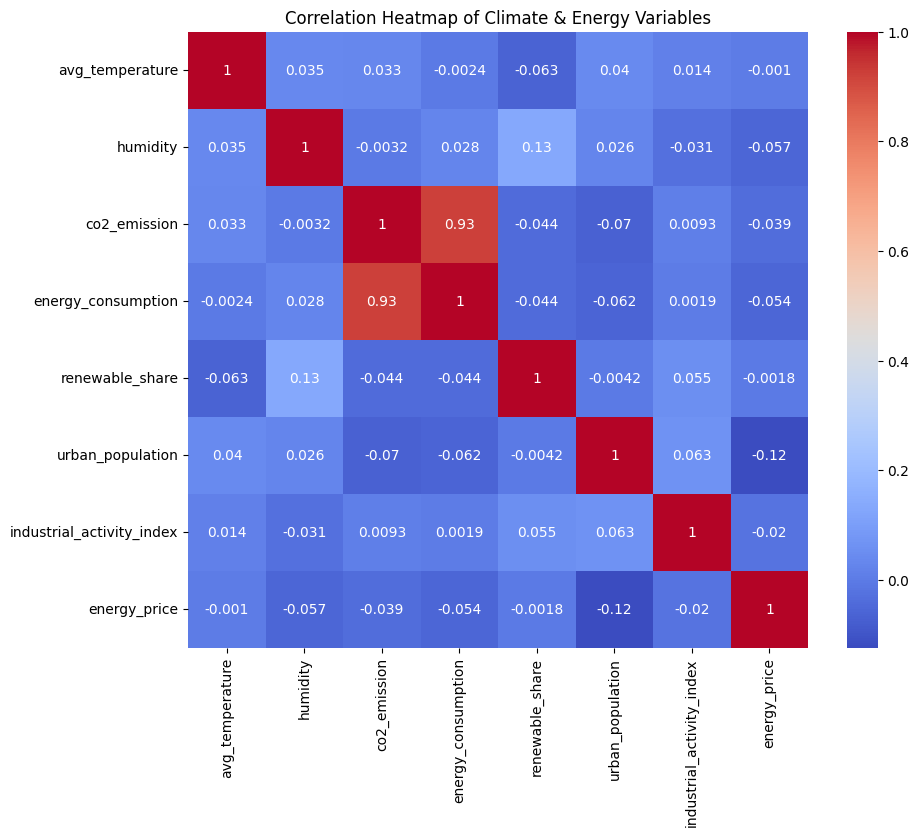

In [13]:
corr = monthly_df[['avg_temperature','humidity','co2_emission',
                  'energy_consumption','renewable_share',
                  'urban_population','industrial_activity_index',
                  'energy_price']].corr()

          # here .corr() is computing the pearson correlation between every pair of numeric columns. we have 8 columns so it calculates the 8*8= 64 correlation


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Climate & Energy Variables")
plt.show()

from above heatmap it displays the relationship between the input features and output like does higher temperature reduces the consumption. from abvove color we can understand that - Red → positive correlation (variables increase together).
- Blue → negative correlation (one increases, the other decreases).
- White/light → near zero correlation (no strong linear relationship).


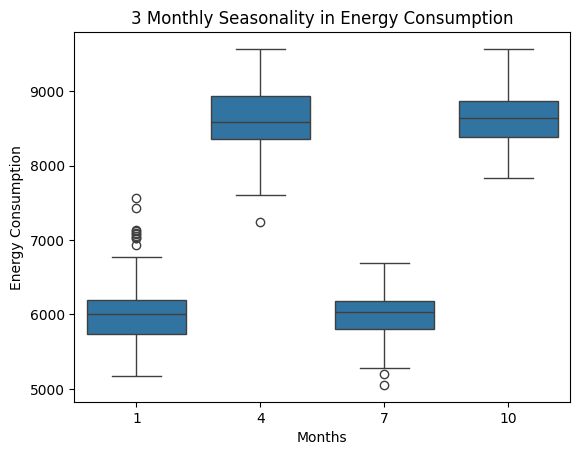

In [14]:

# o=plotting the box plot to know if there is any outlier, what is central
sns.boxplot(x='month', y='energy_consumption', data=monthly_df)
plt.xlabel('Months')
plt.ylabel('Energy Consumption')
plt.title("3 Monthly Seasonality in Energy Consumption")
plt.show()

This box plot illustrates seasonal variation in monthly energy consumption. The median values show that April and October have higher energy use compared to January and July, which are lower. The wider boxes in April and October indicate greater variability, while the presence of outliers in January and July highlights unusual spikes or drops in demand. Overall, the plot reveals that energy consumption follows seasonal cycles, with transitional months (April and October) showing peaks and more fluctuation, while winter and summer months are relatively lower but more inconsistent.


avg_temperature             -0.002379
humidity                     0.027628
co2_emission                 0.925301
renewable_share             -0.044147
urban_population            -0.062343
industrial_activity_index    0.001948
energy_price                -0.054154
energy_consumption           1.000000
Name: energy_consumption, dtype: float64


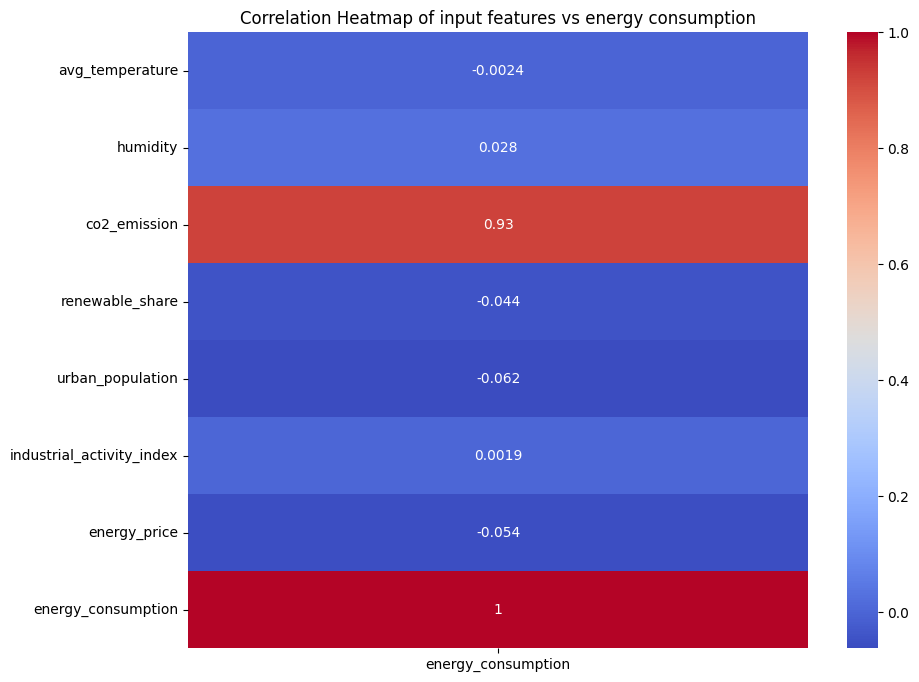

In [15]:
target_corr = monthly_df[['avg_temperature','humidity','co2_emission',
                         'renewable_share','urban_population',
                         'industrial_activity_index','energy_price',
                         'energy_consumption']].corr()['energy_consumption']

print(target_corr)
plt.figure(figsize=(10,8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of input features vs energy consumption")
plt.show()

This heatmap shows how each input feature is related to energy consumption. The only strong relationship is with CO₂ emissions (about 0.93), meaning more energy use leads to more emissions. All other features like temperature, humidity, renewable share, population, industry, and price have correlations very close to zero, so they don’t show a strong direct effect. In short, CO₂ emissions are the most predictive feature, while the others may influence energy use in more complex or indirect ways

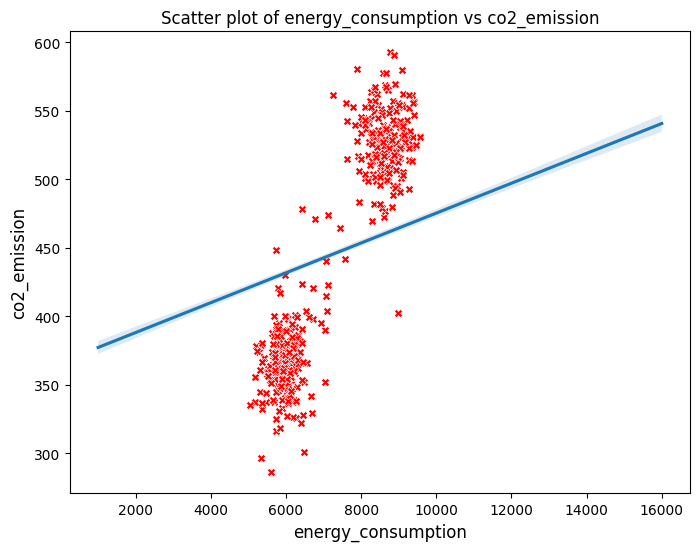

In [16]:
#scatter plot shows the relationship between 2 variables
#it shows relationahip between gni and hdi
#that straignt line represent the trend line or regssion line and if the data are closely clustered around the line then it has positive relation


if 'energy_consumption' in monthly_df:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data= monthly_df,x='energy_consumption',y='co2_emission',marker='X',color='red')
  sns.regplot(data= df,
              x='energy_consumption',
              y='co2_emission',
              scatter=False)  #prints scatter line only\n",
  plt.title("Scatter plot of energy_consumption vs co2_emission"),
  plt.xlabel("energy_consumption",fontsize=12)

    # Label y-axis with HDI
  plt.ylabel("co2_emission",fontsize=12)
  plt.show()
else:
  print("energy_consumption is not available in dataset")


# Build a Primary Model  (Two Classical ML Models): <br>
i will use linear regression and random forest regressor

In [17]:
# importing the necessary library for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error


In [18]:
# here our target value is energu consumption so we will we y as energy consumption and x as other features
X_monthly = monthly_df[['avg_temperature','humidity','co2_emission',
               'renewable_share','urban_population',
               'industrial_activity_index','energy_price']]

Y_monthly = monthly_df['energy_consumption']

In [19]:
# performing the train test
# performing the train test split
X_train_monthly,X_test_monthly,Y_train_monthly,Y_test_monthly= train_test_split(X_monthly,Y_monthly,test_size=0.2,random_state=42)
print("X_train shape: ",X_train_monthly.shape)
print('X_test shape: ',X_test_monthly.shape)
print('Y_train shape: ',Y_train_monthly.shape)
print("Y_test shape:",Y_test_monthly.shape)

X_train shape:  (336, 7)
X_test shape:  (84, 7)
Y_train shape:  (336,)
Y_test shape: (84,)


In [20]:
# scaling
from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
X_train_scalar_monthly= scalar.fit_transform(X_train_monthly)
X_test_scalar_monthly= scalar.transform(X_test_monthly)

# here we perform scaling for regression
#scaling makes all the features in similar range.
#if we do scaling nofeatures will dominates the model

#fit_transform() learn the data or parameters and apply it
#transform() only apply the data



# Building the linear regression/ridge regression

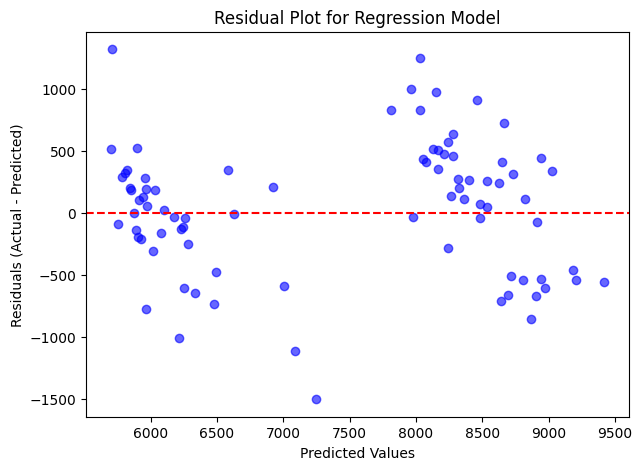

In [67]:
# trainning the model

linear_regression_monthly= LinearRegression()
#linear_regression_monthly= Ridge()
linear_regression_monthly.fit(X_train_scalar_monthly,Y_train_monthly)

# making the prediction in train and test

y_train_pred_monthly=linear_regression_monthly.predict(X_train_scalar_monthly)
y_test_pred_monthly=linear_regression_monthly.predict(X_test_scalar_monthly)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization


# Residuals
residuals = Y_test_monthly - y_test_pred_monthly

plt.figure(figsize=(7,5))
plt.scatter(y_test_pred_monthly, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Regression Model")
plt.show()


if residuals look random → model is good.<br>
If residuals show patterns → model isn’t perfect, maybe you need a more complex


In [68]:
# performing the prediction and evaluation
print("At beginning")
print("R² Score:", r2_score(Y_test_monthly, y_test_pred_monthly))
print("MSE:", mean_squared_error(Y_test_monthly, y_test_pred_monthly))
print("RMSE:",np.sqrt( mean_squared_error(Y_test_monthly, y_test_pred_monthly)))
print("MAE:", mean_absolute_error(Y_test_monthly, y_test_pred_monthly))

At beginning
R² Score: 0.8446598824092765
MSE: 286069.172206059
RMSE: 534.8543467207301
MAE: 424.1394180326943


# **here we will try in another too. we will group the country on different approach make analysis which gives better**

Groupping accoriding to week


In [23]:
# monthly aggragating per country
# Aggregate  monthly averages of energy consumption per country
weekly = (
    df.groupby('country')
      .resample('W', on='date')
      .mean()
      .reset_index()
)

print(weekly.head())
print("Rows after  monthly aggregation:", weekly.shape[0])
weekly['year'] =  weekly['date'].dt.year
weekly['month'] = weekly['date'].dt.month

weekly.head(5)

# here our target value is energu consumption so we will we y as energy consumption and x as other features
X1 = weekly[['avg_temperature','humidity','co2_emission',
               'renewable_share','urban_population',
               'industrial_activity_index','energy_price']]

Y1 = weekly['energy_consumption']

# performing the train test
# performing the train test split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)
# trainning the model


scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)


linear_regression= LinearRegression()
linear_regression.fit(X_train_scalar,Y_train)
# making the prediction in traina and test

y_train_pred=linear_regression.predict(X_train_scalar)
y_test_pred=linear_regression.predict(X_test_scalar)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

# performing the prediction and evaluation
print("At beginning")
print("R² Score:", r2_score(Y_test, y_test_pred))
print("MSE:", mean_squared_error(Y_test, y_test_pred))
print("RMSE:",np.sqrt( mean_squared_error(Y_test, y_test_pred)))
print("MAE:", mean_absolute_error(Y_test, y_test_pred))


     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-01-05        29.526000  56.112000    458.906000   
1  Australia 2020-01-12        29.348571  59.751429    391.815714   
2  Australia 2020-01-19        28.978571  60.357143    438.534286   
3  Australia 2020-01-26        29.030000  66.641429    467.020000   
4  Australia 2020-02-02        29.608571  53.402857    583.741429   

   energy_consumption  renewable_share  urban_population  \
0         3834.984000        11.600000         68.954000   
1         7644.604286        12.415714         75.450000   
2         4805.854286        12.570000         73.502857   
3         6477.155714        10.415714         76.931429   
4         4745.560000         9.008571         70.127143   

   industrial_activity_index  energy_price  
0                  75.186000     97.050000  
1                  67.044286     94.357143  
2                  67.760000    155.341429  
3                  66.098571    117.071429  

grouping according to month

In [24]:
# monthly aggragating per country
# Aggregate  monthly averages of energy consumption per country
monthly = (
    df.groupby('country')
      .resample('M', on='date')
      .mean()
      .reset_index()
)

print(monthly.head())
print("Rows after  monthly aggregation:", monthly.shape[0])
monthly['year'] =  monthly['date'].dt.year
monthly['month'] = monthly['date'].dt.month

monthly.head(5)

# here our target value is energu consumption so we will we y as energy consumption and x as other features
X1 = monthly[['avg_temperature','humidity','co2_emission',
               'renewable_share','urban_population',
               'industrial_activity_index','energy_price']]

Y1 = monthly['energy_consumption']

# performing the train test
# performing the train test split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)
# trainning the model


scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)


linear_regression= LinearRegression()
linear_regression.fit(X_train_scalar,Y_train)
# making the prediction in traina and test

y_train_pred=linear_regression.predict(X_train_scalar)
y_test_pred=linear_regression.predict(X_test_scalar)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

# performing the prediction and evaluation
print("At beginning")
print("R² Score:", r2_score(Y_test, y_test_pred))
print("MSE:", mean_squared_error(Y_test, y_test_pred))
print("RMSE:",np.sqrt( mean_squared_error(Y_test, y_test_pred)))
print("MAE:", mean_absolute_error(Y_test, y_test_pred))


/tmp/ipython-input-3852969022.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M', on='date')


     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-01-31        29.129032  59.520323    448.193226   
1  Australia 2020-02-29        33.432759  53.871724    498.721379   
2  Australia 2020-03-31        35.041290  61.756452    580.137742   
3  Australia 2020-04-30        33.849000  56.947000    502.224667   
4  Australia 2020-05-31        29.434516  62.062258    424.790968   

   energy_consumption  renewable_share  urban_population  \
0         5738.055484        11.165161         73.819032   
1         7249.263103         8.852414         74.500690   
2         8364.867419         9.231935         76.314839   
3         8032.205333        10.108667         72.702333   
4         7715.570968        10.449355         75.756129   

   industrial_activity_index  energy_price  
0                  68.508710    119.663548  
1                  70.835862    130.273448  
2                  72.131935    122.321613  
3                  71.487667    112.018667  

groupping according to 6 month

In [25]:
# monthly aggragating per country
# Aggregate  monthly averages of energy consumption per country
monthly = (
    df.groupby('country')
      .resample('6M', on='date')
      .mean()
      .reset_index()
)

print(monthly.head())
print("Rows after  monthly aggregation:", monthly.shape[0])
monthly['year'] =  monthly['date'].dt.year
monthly['month'] = monthly['date'].dt.month

monthly.head(5)

# here our target value is energu consumption so we will we y as energy consumption and x as other features
X1 = monthly[['avg_temperature','humidity','co2_emission',
               'renewable_share','urban_population',
               'industrial_activity_index','energy_price']]

Y1 = monthly['energy_consumption']

# performing the train test
# performing the train test split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)
# trainning the model


scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)


linear_regression= LinearRegression()
linear_regression.fit(X_train_scalar,Y_train)
# making the prediction in traina and test

y_train_pred=linear_regression.predict(X_train_scalar)
y_test_pred=linear_regression.predict(X_test_scalar)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

# performing the prediction and evaluation
print("At beginning")
print("R² Score:", r2_score(Y_test, y_test_pred))
print("MSE:", mean_squared_error(Y_test, y_test_pred))
print("RMSE:",np.sqrt( mean_squared_error(Y_test, y_test_pred)))
print("MAE:", mean_absolute_error(Y_test, y_test_pred))


/tmp/ipython-input-404250446.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('6M', on='date')


     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-01-31        29.129032  59.520323    448.193226   
1  Australia 2020-07-31        28.764231  59.242967    448.239011   
2  Australia 2021-01-31        18.282989  57.901196    459.388587   
3  Australia 2021-07-31        28.499834  60.225414    428.038508   
4  Australia 2022-01-31        18.468424  63.121685    431.748804   

   energy_consumption  renewable_share  urban_population  \
0         5738.055484        11.165161         73.819032   
1         6996.982473         9.989945         74.593901   
2         7145.511685        10.411304         76.024783   
3         7143.931492        13.290663         74.420608   
4         7166.565761        13.305000         75.131033   

   industrial_activity_index  energy_price  
0                  68.508710    119.663548  
1                  71.070165    118.481044  
2                  68.420652    118.804130  
3                  68.848398    113.372265  

according to quartly


In [26]:
quarterly_df = (
    df.groupby('country')
      .resample('Q', on='date')   # 3-month grouping
      .mean()
      .reset_index()
)

quarterly_df['year'] = quarterly_df['date'].dt.year
quarterly_df['quarter'] = quarterly_df['date'].dt.quarter

print(quarterly_df.head())
print("Rows after 3-month aggregation:", quarterly_df.shape[0])

# quartely aggragating per country


print(quarterly_df.head())
print("Rows after  quarterly_df aggregation:", quarterly_df.shape[0])
quarterly_df['year'] =  quarterly_df['date'].dt.year
quarterly_df['month'] = quarterly_df['date'].dt.month

quarterly_df.head(5)

# here our target value is energu consumption so we will we y as energy consumption and x as other features
X1 = quarterly_df[['avg_temperature','humidity','co2_emission',
               'renewable_share','urban_population',
               'industrial_activity_index','energy_price']]

Y1 = quarterly_df['energy_consumption']

# performing the train test
# performing the train test split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)
# trainning the model


scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)


linear_regression= LinearRegression()
linear_regression.fit(X_train_scalar,Y_train)
# making the prediction in traina and test

y_train_pred=linear_regression.predict(X_train_scalar)
y_test_pred=linear_regression.predict(X_test_scalar)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

# performing the prediction and evaluation
print("At beginning")
print("R² Score:", r2_score(Y_test, y_test_pred))
print("MSE:", mean_squared_error(Y_test, y_test_pred))
print("RMSE:",np.sqrt( mean_squared_error(Y_test, y_test_pred)))
print("MAE:", mean_absolute_error(Y_test, y_test_pred))


/tmp/ipython-input-339224585.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .resample('Q', on='date')   # 3-month grouping


     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-03-31        32.514615  58.481978    509.243736   
1  Australia 2020-06-30        28.920220  59.797253    389.484396   
2  Australia 2020-09-30        14.386630  57.209674    528.583804   
3  Australia 2020-12-31        18.285435  59.410870    393.158261   
4  Australia 2021-03-31        32.345778  59.532556    491.380111   

   energy_consumption  renewable_share  urban_population  \
0         7114.497143         9.769560         74.886484   
1         6714.492527        10.257473         74.363956   
2         7925.256739        10.554239         74.927609   
3         6399.888804         9.718913         76.949348   
4         7921.747889        12.703000         74.652778   

   industrial_activity_index  energy_price  year  quarter  
0                  70.484615    123.950220  2020        1  
1                  69.628132    116.592747  2020        2  
2                  69.969348    116.178370  

In [27]:
# monthly aggragating per country
# Aggregate  monthly averages of energy consumption per country
monthly = (
    df.groupby('country')
      .resample('12M', on='date')
      .mean()
      .reset_index()
)

print(monthly.head())
print("Rows after  monthly aggregation:", monthly.shape[0])
monthly['year'] =  monthly['date'].dt.year
monthly['month'] = monthly['date'].dt.month

monthly.head(5)

# here our target value is energu consumption so we will we y as energy consumption and x as other features
X1 = monthly[['avg_temperature','humidity','co2_emission',
               'renewable_share','urban_population',
               'industrial_activity_index','energy_price']]

Y1 = monthly['energy_consumption']

# performing the train test
# performing the train test split
X_train,X_test,Y_train,Y_test= train_test_split(X1,Y1,test_size=0.2,random_state=42)
print("X_train shape: ",X_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_train shape: ',Y_train.shape)
print("Y_test shape:",Y_test.shape)
# trainning the model


scalar= StandardScaler()
X_train_scalar= scalar.fit_transform(X_train)
X_test_scalar= scalar.transform(X_test)


linear_regression= LinearRegression()
linear_regression.fit(X_train_scalar,Y_train)
# making the prediction in traina and test

y_train_pred=linear_regression.predict(X_train_scalar)
y_test_pred=linear_regression.predict(X_test_scalar)

#y_train_pred = ...	Predict labels for training data to check learning
#y_test_pred = ...	Predict labels for unseen test data to check generalization

# performing the prediction and evaluation
print("At beginning")
print("R² Score:", r2_score(Y_test, y_test_pred))
print("MSE:", mean_squared_error(Y_test, y_test_pred))
print("RMSE:",np.sqrt( mean_squared_error(Y_test, y_test_pred)))
print("MAE:", mean_absolute_error(Y_test, y_test_pred))


/tmp/ipython-input-3524372440.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('12M', on='date')


     country       date  avg_temperature   humidity  co2_emission  \
0  Australia 2020-01-31        29.129032  59.520323    448.193226   
1  Australia 2021-01-31        23.494973  58.568415    453.844262   
2  Australia 2022-01-31        23.442904  61.685452    429.908904   
3  Australia 2023-01-31        23.278986  59.523616    459.300822   
4  Australia 2024-01-31        23.283534  60.499589    466.912137   

   energy_consumption  renewable_share  urban_population  \
0         5738.055484        11.165161         73.819032   
1         7071.652896        10.201776         75.313251   
2         7155.341644        13.297890         74.778740   
3         7261.438548        15.983425         75.208767   
4         7630.444630        19.186110         75.465671   

   industrial_activity_index  energy_price  
0                  68.508710    119.663548  
1                  69.738169    118.643470  
2                  68.920000    111.753589  
3                  72.105863    113.017205  

i have tried on all the possible data like daily,weekly, monthly,quartely,yearly.<br>
i test on the all the possible groupping and i founf this result<br>
_______________________________________________________________________________________<br>
for week <br>
At beginning<br>
R² Score: 0.3153229120548786<br>
MSE: 2653710.425605195<br>
RMSE: 1629.0213091317114<br>
MAE: 1315.598910672208<br>
_______________________________________________________________________________________<br>
according to 1 monthly<br>
At beginning<br>
R² Score: 0.7193366453854072<br>
MSE: 742217.4780983384<br>
RMSE: 861.5204455486465<br>
MAE: 688.2159605249649<br>
_______________________________________________________________________________________<br>
According t0 3 month <br>
At beginning<br>
R² Score: 0.8446598824092765<br>
MSE: 286069.172206059<br>
RMSE: 534.8543467207301<br>
MAE: 424.1394180326943<br>

_______________________________________________________________________________________<br>
According to quartly <br>

At beginning<br>
R² Score: 0.6272973053311335<br>
MSE: 290820.02630451706<br>
RMSE: 539.2773185518904<br>
MAE: 437.57114213724054<br>

_______________________________________________________________________________________<br>
According to yearly<br>
R² Score: 0.21252650497001457
MSE: 111097.34188894334
RMSE: 333.31267886017076
MAE: 241.57859178861113

_______________________________________________________________________________________<br>

but i found the best result from 3 month groupping as R² Score: 0.8446598824092765<br>
MSE: 286069.172206059<br>
RMSE: 534.8543467207301<br>
MAE: 424.1394180326943<br>
so i will use monthly_df as my dataframe


# Hyper parameter tunning using ridge


In [28]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# ridge means r2, it adds penalty to our loss function to avoid overfitting
ridge= Ridge(random_state=42)
param_grid= {
    'alpha':[0.001,0.01,1,10,100,1000]
}
print("alpha values are ",param_grid['alpha'])

alpha values are  [0.001, 0.01, 1, 10, 100, 1000]


In [29]:
ridge_grid_search= GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv= 5,
  scoring='r2',
    n_jobs=-1,
    verbose=1
)
ridge_grid_search.fit(X_train_scalar_monthly, Y_train_monthly)
print("Best Ridge alpha:", ridge_grid_search.best_params_)
print("Best Ridge MSE:", ridge_grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Ridge alpha: {'alpha': 1}
Best Ridge MSE: 0.8513191587999585


In [30]:
# Get the best parameters
best_ridge_alpha = ridge_grid_search.best_params_['alpha']
print(f"Best alpha for Ridge: {best_ridge_alpha}")

# Get cross-validation results
ridge_cv_results = pd.DataFrame(ridge_grid_search.cv_results_)
ridge_cv_results['mean_mse'] = ridge_cv_results['mean_test_score']
ridge_cv_results['std_mse'] = ridge_cv_results['std_test_score']

print("\nCross-Validation Results for Ridge:")
print(ridge_cv_results[['param_alpha', 'mean_mse', 'std_mse']].to_string(index=False))


Best alpha for Ridge: 1

Cross-Validation Results for Ridge:
 param_alpha  mean_mse  std_mse
       0.001  0.851297 0.030462
       0.010  0.851297 0.030462
       1.000  0.851319 0.030426
      10.000  0.850440 0.030148
     100.000  0.787067 0.028724
    1000.000  0.306431 0.016279


In [31]:
# now rebuilding the model after tunning hyper parameter
#finds the best model
best_ridge= ridge_grid_search.best_estimator_
# predictig for testing and traiinning

y_train_pred = best_ridge.predict(X_train_scalar_monthly)
y_test_pred = best_ridge.predict(X_test_scalar_monthly)


# performance on testing
print("after tunning hyper parameter")
print("R² Score:", r2_score(Y_test_monthly, y_test_pred))
print("MSE:", mean_squared_error(Y_test_monthly, y_test_pred))
print("RMSE:",np.sqrt( mean_squared_error(Y_test_monthly, y_test_pred)))
print("MAE:", mean_absolute_error(Y_test_monthly, y_test_pred))

after tunning hyper parameter
R² Score: 0.8445417642553598
MSE: 286286.69465317397
RMSE: 535.0576554476853
MAE: 424.51704523465986


using ridge: after tunning hyper parameter<br>
R² Score: 0.8445417642553598<br>
MSE: 286286.69465317397<br>
RMSE: 535.0576554476853<br>
MAE: 424.51704523465986<br>

# Feature selecton usinf RFE method

In [32]:
from sklearn.feature_selection import RFE

# Step 1: Define RFE with tuned linear regression
rfe_linearRegression = RFE(estimator=best_ridge, n_features_to_select=5)

# Step 2: Transform both train and test sets
X_train_selected_ridge = rfe_linearRegression.fit_transform(X_train_scalar_monthly,Y_train_monthly)
X_test_selected_ridge = rfe_linearRegression.transform(X_test_scalar_monthly)

print("Selected Features :", rfe_linearRegression.support_)
print("Feature Ranking :", rfe_linearRegression.ranking_)

Selected Features : [ True  True  True False  True  True False]
Feature Ranking : [1 1 1 2 1 1 3]


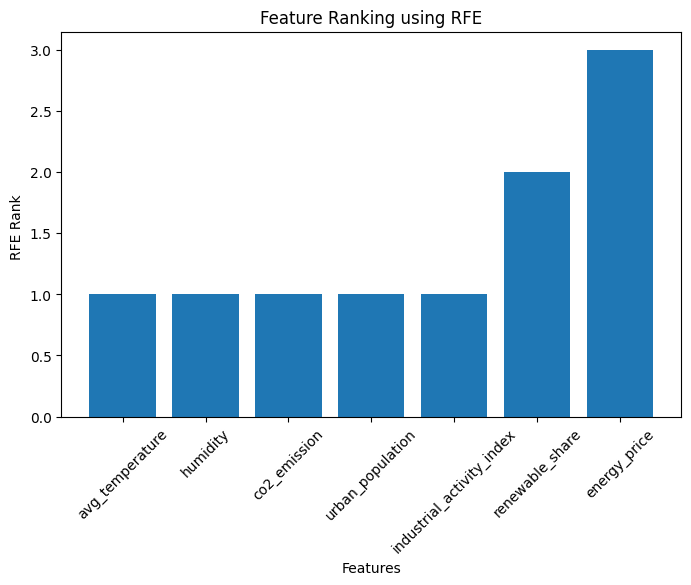

In [33]:
#plotting the ranking of the features
feature_names = X_monthly.columns
# it rank the importance
ranks = rfe_linearRegression.ranking_


feature_ranks = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranks
})

# Sort by importance
feature_ranks = feature_ranks.sort_values(by='Rank')
plt.figure(figsize=(8, 5))
plt.bar(feature_ranks['Feature'], feature_ranks['Rank'])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("RFE Rank ")
plt.title("Feature Ranking using RFE")
plt.show()

above figure shows the top 5 selected features among 7 features. avg_temperature,humidity,c02_emission,urban_population,indrustrial_activity_inde were selected as important features and renewable_share,energy_price were excluded.

**Finally re train the model with optimzed hyperparameter and feature selection**

In [34]:
# retrainning the model
# final_model = LinearRegression()
# find all the best parameetrs from hyperparameter
final_model = Ridge(**ridge_grid_search.best_params_, random_state=42)

#Retrain on selected features (from RFE)
final_model.fit(X_train_selected_ridge, Y_train_monthly)

# Predict on test set
y_pred_rfe = final_model.predict(X_test_selected_ridge)

# Step 4: Evaluate performance
print("Ridge Regression after RFE Feature Selection:")
print("R² Score:", r2_score(Y_test_monthly, y_pred_rfe))
print("MSE:", mean_squared_error(Y_test_monthly, y_pred_rfe))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_monthly, y_pred_rfe)))
print("MAE:", mean_absolute_error(Y_test_monthly, y_pred_rfe))

Ridge Regression after RFE Feature Selection:
R² Score: 0.8436325673248638
MSE: 287961.04135326174
RMSE: 536.6200157963377
MAE: 426.5475310834916


# **Model 2**

# Building random forest regressor

import all the necessary files


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [36]:
rf_regressor= RandomForestRegressor(random_state=42)
# trainnig on test and train data
rf_regressor.fit(X_train_scalar_monthly,Y_train_monthly)


RandomForestRegressor(random_state=42)

- Bagging = Bootstrap + Aggregation
- Bootstrap sampling → each tree is trained on a random sample of the dataset (with replacement).

- Aggregation → combine predictions:
- regression → mean.

In [37]:
# predict the result on both trainnig and testing
Y_train_prediction= rf_regressor.predict(X_train_scalar_monthly)
Y_test_prediction= rf_regressor.predict(X_test_scalar_monthly)


Evaluating the data performance

In [38]:
print("Base line for rando forest regressor")
print("R2 score",r2_score(Y_test_monthly,Y_test_prediction))
print("MSE:", mean_squared_error(Y_test_monthly, Y_test_prediction))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_monthly, Y_test_prediction)))
print("MAE:", mean_absolute_error(Y_test_monthly, Y_test_prediction))

Base line for rando forest regressor
R2 score 0.8915759834462154
MSE: 199670.0475309118
RMSE: 446.84454515067296
MAE: 337.76123982901726


here its baseline output is <br>
Base line for random forest regressor<br>
R2 score 0.8915759834462154<br>
MSE: 199670.0475309118<br>
RMSE:  446.84454515067296<br>
MAE: 337.76123982901726<br>
its output is too way good than linear regression becuase linear regression assune a straight line relationship between feature and target. our dataset has slighlty non linear so i cant catch too good than random forest. but random forest take the average of probability od each tree and it reduce overfitting so it perform good

# **Hyperparameter tunning **

In [39]:
from sklearn.model_selection import GridSearchCV


In [40]:
param_grid={
        # n estimators means number of decision tree
    'n_estimators': [100, 200,300],

    #Maximum number of splits from root to leaf. how long does tree can grow
    'max_depth': [5, 10,15],


    # Minimum samples required to split an internal node
    'min_samples_split': [2, 5,10],
}
#model posible= 3*3*3= 27
#if we do cv=5 then 27*5= 135 models

In [41]:
grid_search=GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2'
)

In [42]:
# fitting the data
grid_search.fit(X_train_scalar_monthly,Y_train_monthly)
#best input
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best CV R² Score: 0.8930950064485229


In [43]:
# now rebuilding the model after tunning hyper parameter
#finds the best model
best_model= grid_search.best_estimator_
# predictig for testing and traiinning

y_train_pred_regressor = best_model.predict(X_train_scalar_monthly)
y_test_pred_regressor = best_model.predict(X_test_scalar_monthly)


# performance on testing
print("after tunning hyper parameter")
print("R² Score:", r2_score(Y_test_monthly, y_test_pred_regressor))
print("MSE:", mean_squared_error(Y_test_monthly, y_test_pred_regressor))
print("RMSE:",np.sqrt( mean_squared_error(Y_test_monthly, y_test_pred_regressor)))
print("MAE:", mean_absolute_error(Y_test_monthly, y_test_pred_regressor))

after tunning hyper parameter
R² Score: 0.8934028732506123
MSE: 196305.7082851256
RMSE: 443.0640002134292
MAE: 332.2650521467257


feature selection using RFE

In [44]:
rfe_random_forest= RFE(estimator=best_model, n_features_to_select=5)

# fit the model on trainning and testing
X_train_selected_rf= rfe_random_forest.fit_transform(X_train_scalar_monthly,Y_train_monthly)
X_test_selected_rf= rfe_random_forest.transform(X_test_scalar_monthly)


print("Selected Features:", rfe_random_forest.support_)   # Boolean mask of selected features
print("Feature Ranking:", rfe_random_forest.ranking_)

Selected Features: [ True False  True  True False  True  True]
Feature Ranking: [1 3 1 1 2 1 1]


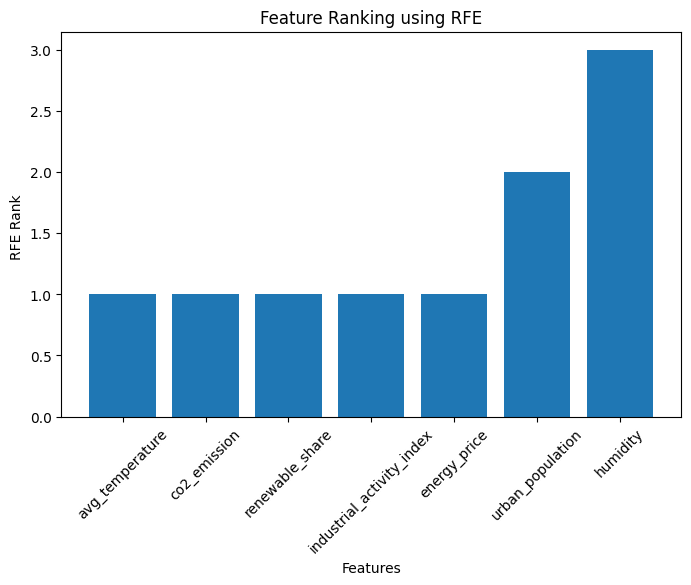

In [45]:
#plotting the ranking of the features
feature_names = X_monthly.columns
ranks = rfe_random_forest.ranking_


feature_ranks = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranks
})

# Sort by importance
feature_ranks = feature_ranks.sort_values(by='Rank')
plt.figure(figsize=(8, 5))
plt.bar(feature_ranks['Feature'], feature_ranks['Rank'])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("RFE Rank ")
plt.title("Feature Ranking using RFE")
plt.show()

In [46]:
# now building the final model with tuned hyper parameter and selected featurs
#get all the best parameters from grid search
final_rf_model= RandomForestRegressor(**grid_search.best_params_, random_state=42)
# retrainning the model on selected rfe
final_rf_model.fit(X_train_selected_rf,Y_train_monthly)
# doing prediction
Y_final_pred= final_rf_model.predict(X_test_selected_rf)

print("Random Forest Regressor after RFE Feature Selection:")
print("R² Score:", r2_score(Y_test_monthly, Y_final_pred))
print("MSE:", mean_squared_error(Y_test_monthly, Y_final_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_monthly, Y_final_pred)))
print("MAE:", mean_absolute_error(Y_test_monthly, Y_final_pred))



Random Forest Regressor after RFE Feature Selection:
R² Score: 0.8925006039601852
MSE: 197967.2972746453
RMSE: 444.93516075339033
MAE: 337.6092463996401


In [47]:

# Collect results from your evaluations
results = {
    "Model": ["Ridge Regression", "Random Forest Regressor"],
    "Features Used": [X_train_selected_rf.shape[1], X_train_selected_rf.shape[1]],  # both used 5 features
    "CV Score": [ridge_grid_search.best_score_, grid_search.best_score_],
    "Test RMSE": [
        np.sqrt(mean_squared_error(Y_test_monthly, y_pred_rfe)),
        np.sqrt(mean_squared_error(Y_test_monthly, Y_final_pred))
    ],
    "Test R²": [
        r2_score(Y_test_monthly, y_pred_rfe),
        r2_score(Y_test_monthly, Y_final_pred)
    ],
    "MAE": [
        mean_absolute_error(Y_test_monthly, y_pred_rfe),
        mean_absolute_error(Y_test_monthly, Y_final_pred)
    ],
    "MSE":[
        mean_squared_error(Y_test_monthly, y_pred_rfe),
        mean_squared_error(Y_test_monthly, Y_final_pred)
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(results)

print(comparison_df)

                     Model  Features Used  CV Score   Test RMSE   Test R²  \
0         Ridge Regression              5  0.851319  536.620016  0.843633   
1  Random Forest Regressor              5  0.893095  444.935161  0.892501   

          MAE            MSE  
0  426.547531  287961.041353  
1  337.609246  197967.297275  


“RMSE and MAE are error metrics expressed in the same units as the target variable. Since our target values are very large, the errors also look large numerically. But when compared to the scale of energy consumption, these errors are actually very small — less than 1% of the target values. That’s why R² is a better indicator of performance here, and it shows our models explain most of the variance. Random Forest achieved lower RMSE and MAE than Ridge, confirming its stronger predictive ability. our model is predicting with a gap of 536 for ridge and 444 for random forest

# **Building Neural Model**

In [48]:
# performing the scaling
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_monthly)
X_test_reg_scaled = scaler_reg.transform(X_test_monthly)

Creating the mlp regressor

In [49]:
from sklearn.neural_network import MLPRegressor
mlp_reg= MLPRegressor(

   hidden_layer_sizes=(1000,500),      # Two hidden layers
   #for first layer if we have 7 parameter then 7*1000+1000=8000
   #for secod layer gets 1000 output from first layer so 1000*500+500= 500000+500=500500
   #for output= 500*1+1= 501
   #sum= 8000+500500+501=
    activation='relu',                # ReLU activation
  #  it is used in backward propagation to optimize the weight inorder to minimize the loss
    solver='adam',                    # Adam optimizer
    alpha=0.001,                     # L2 regularization
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=2000,                     # Increased for demonstration
    early_stopping=True,              # Stop when validation score doesn't improve
    validation_fraction=0.1,          # 10% of training for validation
    n_iter_no_change=20,              # Stop after 10 iterations with no improvement
    random_state=42,
    verbose=True                      # Show training progress
)

In [50]:
# train the regressor
mlp_reg.fit(X_train_reg_scaled ,Y_train_monthly)

Iteration 1, loss = 27070377.66653842
Validation score: -23.193361
Iteration 2, loss = 27059322.47606485
Validation score: -23.182421
Iteration 3, loss = 27047435.58845141
Validation score: -23.169894
Iteration 4, loss = 27033767.27378488
Validation score: -23.155330
Iteration 5, loss = 27017946.52357847
Validation score: -23.138476
Iteration 6, loss = 26999405.83426826
Validation score: -23.119073
Iteration 7, loss = 26978200.53055830
Validation score: -23.096866
Iteration 8, loss = 26953686.94855396
Validation score: -23.071511
Iteration 9, loss = 26925965.78523707
Validation score: -23.042616
Iteration 10, loss = 26894219.58603803
Validation score: -23.009794
Iteration 11, loss = 26858143.27806921
Validation score: -22.972654
Iteration 12, loss = 26816614.19741445
Validation score: -22.930785
Iteration 13, loss = 26770548.43771715
Validation score: -22.883659
Iteration 14, loss = 26718094.50632879
Validation score: -22.830718
Iteration 15, loss = 26659318.88296993
Validation score: 

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(1000, 500),
             max_iter=2000, n_iter_no_change=20, random_state=42, verbose=True)

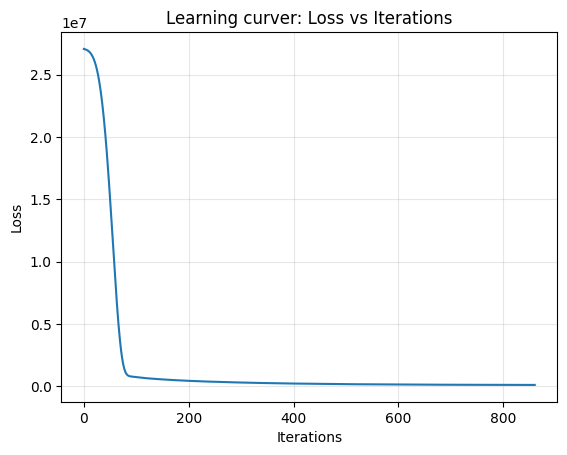

In [51]:


# Plot training loss curve
plt.plot(mlp_reg.loss_curve_,  label='Training Loss')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning curver: Loss vs Iterations")
plt.grid(True, alpha=0.3)
plt.show()

- At the start, the loss is very high, but it drops sharply in the first few iterations, meaning the model is quickly learning basic patterns.
- As iterations increase, the curve levels off, showing that the model is converging — improvements become smaller because it has already captured most of the learnable structure.
- The final plateau indicates the model has reached a stable point: further training won’t reduce loss significantly unless you adjust hyperparameters (e.g., learning rate, hidden layers).


In [52]:

# Predictions
y_pred_mlp = mlp_reg.predict(X_test_reg_scaled)

print("\nfor neural network (MLP Regressor) ----------------------------->")
print(f"R² Score: {r2_score(Y_test_monthly, y_pred_mlp):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_monthly, y_pred_mlp):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test_monthly, y_pred_mlp)):.2f}")
print(f"Number of iterations completed: {mlp_reg.n_iter_}")


for neural network (MLP Regressor) ----------------------------->
R² Score: 0.7963
Mean Absolute Error: 492.64
Root Mean Squared Error: 612.46
Number of iterations completed: 861


for neural network R² Score: 0.7963
Mean Absolute Error: 492.64
Root Mean Squared Error: 612.46
Number of iterations completed: 861.... it is not comparing better in comparison to linear regression and random forest.

In [70]:

results = {
    "Model": ["Ridge Regression", "Random Forest Regressor", "Neural Network (MLP)"],
    "Features Used": [
        X_train_selected_ridge.shape[1],
        X_train_selected_rf.shape[1],
        X_train_reg_scaled.shape[1]
    ],
    "CV Score": [
        ridge_grid_search.best_score_,
        grid_search.best_score_,
        None
    ],
    "Test R²": [
        r2_score(Y_test_monthly, y_pred_rfe),
        r2_score(Y_test_monthly, Y_final_pred),
        r2_score(Y_test_monthly, y_pred_mlp)
    ],
    "Test RMSE": [
        np.sqrt(mean_squared_error(Y_test_monthly, y_pred_rfe)),
        np.sqrt(mean_squared_error(Y_test_monthly, Y_final_pred)),
        np.sqrt(mean_squared_error(Y_test_monthly, y_pred_mlp))
    ],
    "MAE": [
        mean_absolute_error(Y_test_monthly, y_pred_rfe),
        mean_absolute_error(Y_test_monthly, Y_final_pred),
        mean_absolute_error(Y_test_monthly, y_pred_mlp)
    ],
    "MSE": [
        mean_squared_error(Y_test_monthly, y_pred_rfe),
        mean_squared_error(Y_test_monthly, Y_final_pred),
        mean_squared_error(Y_test_monthly, y_pred_mlp)
    ]
}

comparison_df = pd.DataFrame(results)

print("\n Final Regression Model Comparison:\n")
print(comparison_df)


 Final Regression Model Comparison:

                     Model  Features Used  CV Score   Test R²   Test RMSE  \
0         Ridge Regression              5  0.851319  0.843633  536.620016   
1  Random Forest Regressor              5  0.893095  0.892501  444.935161   
2     Neural Network (MLP)              7       NaN  0.796313  612.457025   

          MAE            MSE  
0  426.547531  287961.041353  
1  337.609246  197967.297275  
2  492.639250  375103.607070  
